In [110]:
import os
import pathlib
import warnings
import glob as gl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import log as ln
from sklearn.cluster import KMeans
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering

import seaborn as sns
from sklearn import metrics
from sklearn.decomposition import PCA
matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')

In [81]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 10})

In [82]:
data = pd.read_csv('/Users/alduck/Documents/PhDStuff_repo/PasiveTestingUsingMTplusFuzzTesting/AuxScripts/finalLog.csv', index_col=0)

In [83]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
input_a,200.0,4.910,2.789409,0.0,3.00,5.0,7.00,9.0
input_b,200.0,4.030,2.695446,0.0,1.75,4.0,6.00,9.0
operand,200.0,0.500,0.501255,0.0,0.00,0.5,1.00,1.0
output,200.0,4.910,5.600781,-8.0,1.00,5.0,9.00,17.0
MR1_input_a,200.0,4.030,2.695446,0.0,1.75,4.0,6.00,9.0
MR1_input_b,200.0,4.910,2.789409,0.0,3.00,5.0,7.00,9.0
MR1_output,200.0,4.030,6.267015,-8.0,-1.25,4.0,9.00,17.0
constant,200.0,4.710,2.906569,0.0,2.00,5.0,7.00,9.0
MR2_input_a,200.0,22.250,20.753337,0.0,5.00,17.0,35.25,81.0
MR2_input_b,200.0,18.040,16.479572,0.0,3.00,14.5,30.50,63.0


In [84]:
data = data.drop(['operand_str', 'MR1_checker_str', 'MR2_checker_str', 'MR3_checker_str', 'MR4_checker_str'], axis=1)

In [85]:
clustering = AgglomerativeClustering().fit(data)

In [86]:
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data)

In [87]:
y_km

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0,
       1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 1, 0,
       1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 2, 0, 1, 1, 0, 0, 1, 0,
       0, 2], dtype=int32)

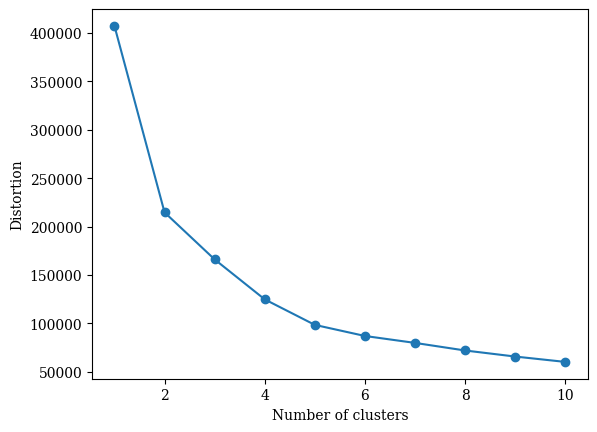

In [88]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

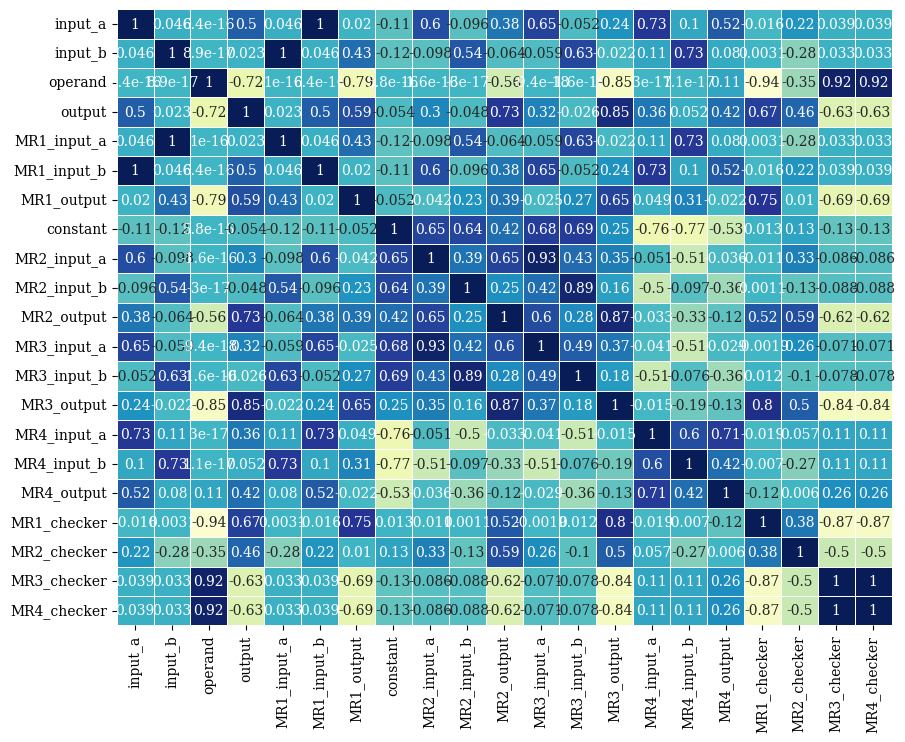

In [89]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [90]:
from scipy.stats import zscore
mydata_z = data.apply(zscore)
# mydata_z = data.copy()
mydata_z.head()

,input_a,input_b,operand,output,MR1_input_a,MR1_input_b,MR1_output,constant,MR2_input_a,MR2_input_b,...,MR3_input_a,MR3_input_b,MR3_output,MR4_input_a,MR4_input_b,MR4_output,MR1_checker,MR2_checker,MR3_checker,MR4_checker
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,-0.686451,-1.498866,1.0,-0.341880,-1.498866,-0.686451,-1.124561,0.100024,-0.350218,-1.097436,...,-0.426973,-1.008515,-0.647479,-0.519991,-1.032159,0.467446,-1.061913,0.538816,0.922958,0.922958
1,0.751143,0.360769,1.0,-0.520874,0.360769,0.751143,-0.964595,1.134759,1.630325,1.335903,...,1.417971,1.148736,-0.745286,-0.283632,-0.554307,0.300501,-1.061913,0.538816,0.922958,0.922958
2,0.751143,-1.126939,1.0,0.195104,-1.126939,0.751143,-1.604459,0.789848,1.292184,-0.671601,...,1.154408,-0.199546,-0.354060,-0.047272,-1.271084,0.968282,-1.061913,0.538816,0.922958,0.922958
3,-0.327053,-1.498866,1.0,-0.162885,-1.498866,-0.327053,-1.284527,-1.279622,-0.881583,-1.097436,...,-1.217663,-2.087141,-0.549673,0.661807,-0.076456,0.634392,-1.061913,0.538816,0.922958,0.922958
4,-1.405248,-0.011158,1.0,-1.415847,-0.011158,-1.405248,-0.164765,-0.934711,-0.978195,-0.610768,...,-1.744790,-0.738859,-1.234319,-0.283632,0.640321,-0.534224,-1.061913,-1.855921,0.922958,0.922958


In [91]:
# List to store cluster and intra cluster distance
clusters = []
inertia_vals = []
# Since creating one cluster is similar to observing the data as a whole, multiple values of K are utilized to come up with the optimum cluster value
#Note: Cluster number and intra cluster distance is appended for plotting the elbow curve
for k in range(1, 20, 1):
    
    # train clustering with the specified K
    model = KMeans(n_clusters=k, random_state=7)
    model.fit(mydata_z)
# append model to cluster list
    clusters.append(model)
    inertia_vals.append(model.inertia_)

In [92]:
clusters

[KMeans(n_clusters=1, random_state=7),
 KMeans(n_clusters=2, random_state=7),
 KMeans(n_clusters=3, random_state=7),
 KMeans(n_clusters=4, random_state=7),
 KMeans(n_clusters=5, random_state=7),
 KMeans(n_clusters=6, random_state=7),
 KMeans(n_clusters=7, random_state=7),
 KMeans(random_state=7),
 KMeans(n_clusters=9, random_state=7),
 KMeans(n_clusters=10, random_state=7),
 KMeans(n_clusters=11, random_state=7),
 KMeans(n_clusters=12, random_state=7),
 KMeans(n_clusters=13, random_state=7),
 KMeans(n_clusters=14, random_state=7),
 KMeans(n_clusters=15, random_state=7),
 KMeans(n_clusters=16, random_state=7),
 KMeans(n_clusters=17, random_state=7),
 KMeans(n_clusters=18, random_state=7),
 KMeans(n_clusters=19, random_state=7)]

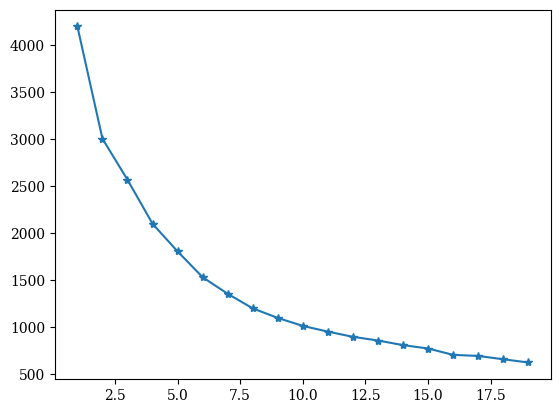

In [93]:
# plot the inertia vs K values
plt.plot(range(1,20,1),inertia_vals,marker='*')
plt.show()

In [94]:
silhouette_avg = []

for i in range(1,19,1):
    silhouette_avg.append(silhouette_score(mydata_z, clusters[i].predict(mydata_z)))
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(mydata_z, clusters[i].predict(mydata_z)))

---------------------------------------
KMeans(n_clusters=2, random_state=7)
Silhouette score: 0.28203967502858857
---------------------------------------
KMeans(n_clusters=3, random_state=7)
Silhouette score: 0.26168692916860126
---------------------------------------
KMeans(n_clusters=4, random_state=7)
Silhouette score: 0.27843867421106544
---------------------------------------
KMeans(n_clusters=5, random_state=7)
Silhouette score: 0.2918109492973291
---------------------------------------
KMeans(n_clusters=6, random_state=7)
Silhouette score: 0.30043071667359117
---------------------------------------
KMeans(n_clusters=7, random_state=7)
Silhouette score: 0.3114269802808108
---------------------------------------
KMeans(random_state=7)
Silhouette score: 0.31077066716602886
---------------------------------------
KMeans(n_clusters=9, random_state=7)
Silhouette score: 0.3244806092648363
---------------------------------------
KMeans(n_clusters=10, random_state=7)
Silhouette score: 0

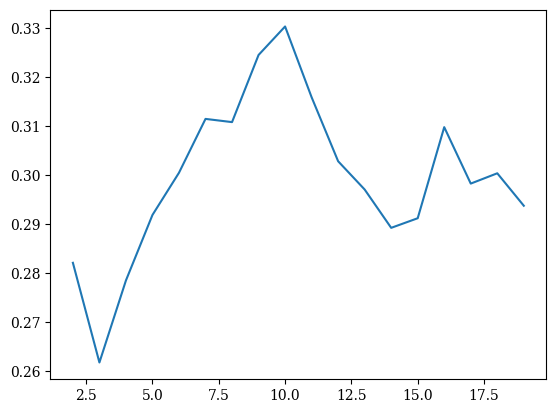

In [95]:

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9 ,10,11,12,13,14,15,16,17,18,19]
plt.plot(range_n_clusters,silhouette_avg)

plt.show()

In [96]:
for i in range(1,9,1):
    
    print("---------------------------------------")
    print(clusters[i])
    print("Silhouette score:",silhouette_score(mydata_z, clusters[i].predict(mydata_z)))

---------------------------------------
KMeans(n_clusters=2, random_state=7)
Silhouette score: 0.28203967502858857
---------------------------------------
KMeans(n_clusters=3, random_state=7)
Silhouette score: 0.26168692916860126
---------------------------------------
KMeans(n_clusters=4, random_state=7)
Silhouette score: 0.27843867421106544
---------------------------------------
KMeans(n_clusters=5, random_state=7)
Silhouette score: 0.2918109492973291
---------------------------------------
KMeans(n_clusters=6, random_state=7)
Silhouette score: 0.30043071667359117
---------------------------------------
KMeans(n_clusters=7, random_state=7)
Silhouette score: 0.3114269802808108
---------------------------------------
KMeans(random_state=7)
Silhouette score: 0.31077066716602886
---------------------------------------
KMeans(n_clusters=9, random_state=7)
Silhouette score: 0.3244806092648363


In [97]:
def Kmeans(X, n_clusters):
    model = KMeans(n_clusters)
    model.fit(X)
    cluster_labels = model.predict(X)
    cent = model.cluster_centers_
    inertia = model.inertia_

    return cluster_labels, cent, inertia

In [98]:
def k_optimal_silhouetteCoffin(x, ini):
    range_n_clusters = np.arange(ini, 15)  # Possibles K optimos
    aux = []
    for n_clusters in range_n_clusters:
        label, cent, inert = Kmeans(x, n_clusters)
        silhouette_avg = silhouette_score(x, label)
        aux.append(silhouette_avg)
    return range_n_clusters, aux


In [99]:
cluster_labels, cent, inert = Kmeans(mydata_z, 10)

In [100]:
kmeans = pd.DataFrame(cluster_labels)

In [101]:
data.insert((data.shape[1]), 'clusters', kmeans)

In [102]:
data['clusters'].value_counts()

4    58
0    50
2    48
6    44
Name: clusters, dtype: int64

In [105]:
data

,input_a,input_b,operand,output,MR1_input_a,MR1_input_b,MR1_output,constant,MR2_input_a,MR2_input_b,...,MR3_input_b,MR3_output,MR4_input_a,MR4_input_b,MR4_output,MR1_checker,MR2_checker,MR3_checker,MR4_checker,clusters
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,3,0,1,3.0,0.0,3.0,-3.0,5.0,15.0,0.0,...,5.0,3.0,-2.0,-5.0,3.0,0.0,1.0,1.0,1.0,2
1,7,5,1,2.0,5.0,7.0,-2.0,8.0,56.0,40.0,...,13.0,2.0,-1.0,-3.0,2.0,0.0,1.0,1.0,1.0,4
2,7,1,1,6.0,1.0,7.0,-6.0,7.0,49.0,7.0,...,8.0,6.0,0.0,-6.0,6.0,0.0,1.0,1.0,1.0,4
3,4,0,1,4.0,0.0,4.0,-4.0,1.0,4.0,0.0,...,1.0,4.0,3.0,-1.0,4.0,0.0,1.0,1.0,1.0,2
4,1,4,1,-3.0,4.0,1.0,3.0,2.0,2.0,8.0,...,6.0,-3.0,-1.0,2.0,-3.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8,7,0,15.0,7.0,8.0,15.0,1.0,8.0,7.0,...,8.0,17.0,7.0,6.0,13.0,1.0,1.0,0.0,0.0,6
96,1,9,0,10.0,9.0,1.0,10.0,3.0,3.0,27.0,...,12.0,16.0,-2.0,6.0,4.0,1.0,1.0,0.0,0.0,0
97,3,1,0,4.0,1.0,3.0,4.0,3.0,9.0,3.0,...,4.0,10.0,0.0,-2.0,-2.0,1.0,1.0,0.0,0.0,2


In [113]:
pca = PCA(n_components=2)
pca.fit(mydata_z)

PCA(n_components=2)

In [ ]:
x = 

In [103]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

NameError: name 'X' is not defined